In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pandas.plotting import autocorrelation_plot, lag_plot, bootstrap_plot
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties

In [3]:
df_PMData = pd.read_csv('PMData_features_vector.csv')
df_PMData.head()

,item_id,date,steps,sedentary,LPA,MPA,VPA,active
0,p01,2019-11-01,17873.0,636,245,58,72,4
1,p01,2019-11-02,13118.0,709,202,43,56,4
2,p01,2019-11-03,14312.0,648,262,63,45,4
3,p01,2019-11-04,10970.0,760,230,23,28,3
4,p01,2019-11-05,16186.0,737,263,22,56,4


In [4]:
df_PMData['date'] = pd.to_datetime(df_PMData['date'])

#font
font_path = 'XB Niloofar.ttf'
persian_font = FontProperties(fname=font_path, size=14)

# Get list of unique participant IDs
unique_ids = df_PMData['item_id'].unique()

# Set the style of the plots
sns.set_style("whitegrid")

# Loop for each participant
for item_id in unique_ids:
    # Create a directory for each participant
    output_dir = f'./{item_id}_plots'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Filter data for the current participant
    participant_df = df_PMData[df_PMData['item_id'] == item_id].copy()

    if participant_df.empty:
        continue
    

    #Prepare font
    title_text = f'توزیع متغیرهای عددی برای شرکت‌کننده {item_id}'
    reshaped_title = arabic_reshaper.reshape(title_text)
    bidi_title = get_display(reshaped_title)  

    # Histogram (Distribution for Data)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(bidi_title, fontproperties=persian_font)

    steps_title = get_display(arabic_reshaper.reshape("توزیع قدم‌ها"))
    sns.histplot(participant_df['steps'], bins=15, ax=axes[0, 0], kde=True)
    axes[0, 0].set_title(steps_title, fontproperties=persian_font)
    xlabels = get_display(arabic_reshaper.reshape("تعداد قدم‌ها"))
    ylabels = get_display(arabic_reshaper.reshape("تکرار"))
    axes[0, 0].set_xlabel(xlabels, fontproperties=persian_font)
    axes[0, 0].set_ylabel(ylabels, fontproperties=persian_font)

    sedentary_title = get_display(arabic_reshaper.reshape("توزیع زمان نشستن"))
    sns.histplot(participant_df['sedentary'], bins=15, ax=axes[0, 1], kde=True)
    axes[0, 1].set_title(sedentary_title, fontproperties=persian_font)
    xlabels = get_display(arabic_reshaper.reshape("میزان زمان نشستن (دقیقه)"))
    ylabels = get_display(arabic_reshaper.reshape("تکرار"))
    axes[0, 1].set_xlabel(xlabels, fontproperties=persian_font)
    axes[0, 1].set_ylabel(ylabels, fontproperties=persian_font)

    LPA_title = get_display(arabic_reshaper.reshape("توزیع فعالیت بدنی سبک (LPA)"))
    sns.histplot(participant_df['LPA'], bins=15, ax=axes[0, 2], kde=True)
    axes[0, 2].set_title(LPA_title, fontproperties=persian_font)
    xlabels = get_display(arabic_reshaper.reshape("توزیع فعالیت بدنی سبک "))
    ylabels = get_display(arabic_reshaper.reshape("تکرار"))
    axes[0, 2].set_xlabel(xlabels, fontproperties=persian_font)
    axes[0, 2].set_ylabel(ylabels, fontproperties=persian_font)

    MPA_title = get_display(arabic_reshaper.reshape("توزیع فعالیت بدنی متوسط (MPA)"))
    sns.histplot(participant_df['MPA'], bins=15, ax=axes[1, 0], kde=True)
    axes[1, 0].set_title(MPA_title, fontproperties=persian_font)
    xlabels = get_display(arabic_reshaper.reshape("توزیع فعالیت بدنی متوسط"))
    ylabels = get_display(arabic_reshaper.reshape("تکرار"))
    axes[1, 0].set_xlabel(xlabels, fontproperties=persian_font)
    axes[1, 0].set_ylabel(ylabels, fontproperties=persian_font)

    VPA_title = get_display(arabic_reshaper.reshape("توزیع فعالیت بدنی شدید (VPA)"))
    sns.histplot(participant_df['VPA'], bins=15, ax=axes[1, 1], kde=True)
    axes[1, 1].set_title(VPA_title, fontproperties=persian_font)
    xlabels = get_display(arabic_reshaper.reshape("توزیع فعالیت بدنی شدید"))
    ylabels = get_display(arabic_reshaper.reshape("تکرار"))
    axes[1, 1].set_xlabel(xlabels, fontproperties=persian_font)
    axes[1, 1].set_ylabel(ylabels, fontproperties=persian_font)

    fig.delaxes(axes[1, 2])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'{output_dir}/{item_id}_histograms.png')
    plt.close(fig)

    # Bar chart (activity levels)
    bar_text = f' میزان تکرار سطوح فعالیت برای شرکت کننده {item_id}'
    reshaped_title = arabic_reshaper.reshape(bar_text)
    bidi_title = get_display(reshaped_title)
    if not participant_df['active'].dropna().empty:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='active', data=participant_df, order=sorted(participant_df['active'].unique()), palette='viridis')
        plt.title(bidi_title, fontproperties=persian_font)
        x_text = get_display(arabic_reshaper.reshape("سطوح فعالیت"))
        plt.xlabel(x_text, fontproperties=persian_font)
        y_text = get_display(arabic_reshaper.reshape("تعداد"))
        plt.ylabel(y_text, fontproperties=persian_font)
        plt.savefig(f'{output_dir}/{item_id}_activity_levels_bar.png')
        plt.close()

    # Box plot (distribution of steps at each activity level)
    box_text = f'توزیع قدم‌ها در سطوح فعالیت برای شرکت کننده {item_id}'
    if not participant_df['active'].dropna().empty:
        plt.figure(figsize=(12, 7))
        sns.boxplot(x='active', y='steps', data=participant_df, palette='magma', order=sorted(participant_df['active'].unique()))
        plt.title(get_display(arabic_reshaper.reshape(box_text)), fontproperties=persian_font)
        x_text = get_display(arabic_reshaper.reshape("سطح فعالیت"))
        plt.xlabel(x_text, fontproperties=persian_font)
        y_text = get_display(arabic_reshaper.reshape("تعداد قدم‌ها"))
        plt.ylabel(y_text, fontproperties=persian_font)
        plt.savefig(f'{output_dir}/{item_id}_steps_by_activity_boxplot.png')
        plt.close()

    # Line plot (steps over time)
    line_text = f'تعداد قدم‌ها در طول زمان برای شرکت کننده {item_id}'
    plt.figure(figsize=(15, 7))
    participant_df_sorted = participant_df.sort_values('date')
    sns.lineplot(x='date', y='steps', data=participant_df_sorted)
    plt.title(get_display(arabic_reshaper.reshape(line_text)), fontproperties=persian_font)
    x_text = get_display(arabic_reshaper.reshape("تاریخ"))
    plt.xlabel(x_text, fontproperties=persian_font)
    y_text = get_display(arabic_reshaper.reshape("تعداد قدم‌ها"))
    plt.ylabel(y_text, fontproperties=persian_font)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{item_id}_steps_over_time.png')
    plt.close()

    participant_steps = participant_df['steps'].dropna()
    if not participant_steps.empty:
            # Autocorrelation Plot
            plt.figure(figsize=(12, 6))
            autocorrelation_plot(participant_steps)
            auto_text = f"خودهمبستگی قدم ها برای شرکت کننده {item_id}"
            plt.title(get_display(arabic_reshaper.reshape(auto_text)), fontproperties=persian_font)
            x_text = get_display(arabic_reshaper.reshape("تاخیر"))
            plt.xlabel(x_text, fontproperties=persian_font)
            y_text = get_display(arabic_reshaper.reshape("خودهمبستگی"))
            plt.ylabel(y_text, fontproperties=persian_font)
            plt.savefig(f'{output_dir}/{item_id}_autocorrelation.png')
            plt.close()

            # Lag Plot
            plt.figure(figsize=(8, 8))
            lag_plot(participant_steps, lag=1)
            lag_text = f"نمودار تأخیر (Lag=1) برای قدم ها در {item_id}"
            plt.title(get_display(arabic_reshaper.reshape(lag_text)), fontproperties=persian_font)
            x_text = get_display(arabic_reshaper.reshape("تاخیر"))
            plt.xlabel(x_text, fontproperties=persian_font)
            y_text = get_display(arabic_reshaper.reshape("خودهمبستگی"))
            plt.ylabel(y_text, fontproperties=persian_font)
            plt.savefig(f'{output_dir}/{item_id}_lag_plot.png')
            plt.close()

            # Bootstrap Plot
            plt.figure()
            bootstrap_plot(participant_steps, size=100, samples=500)
            bootstrap_text = f"نمودار بوت‌استرپ برای قدم‌ها در {item_id}"
            plt.suptitle(get_display(arabic_reshaper.reshape(bootstrap_text)), y=0.95, fontproperties=persian_font)
            plt.tight_layout(rect=[0, 0, 1, 1])
            plt.savefig(f'{output_dir}/{item_id}_bootstrap_plot.png')
            plt.close()

print(f"Generated plots for {len(unique_ids)} participants.")

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_9516\1147391130.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='active', data=participant_df, order=sorted(participant_df['active'].unique()), palette='viridis')
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_9516\1147391130.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='active', y='steps', data=participant_df, palette='magma', order=sorted(participant_df['active'].unique()))
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_9516\1147391130.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

Generated plots for 15 participants.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_9516\1492428647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='item_id', y='steps', data=df_PMData, order=sorted_order, palette='viridis')


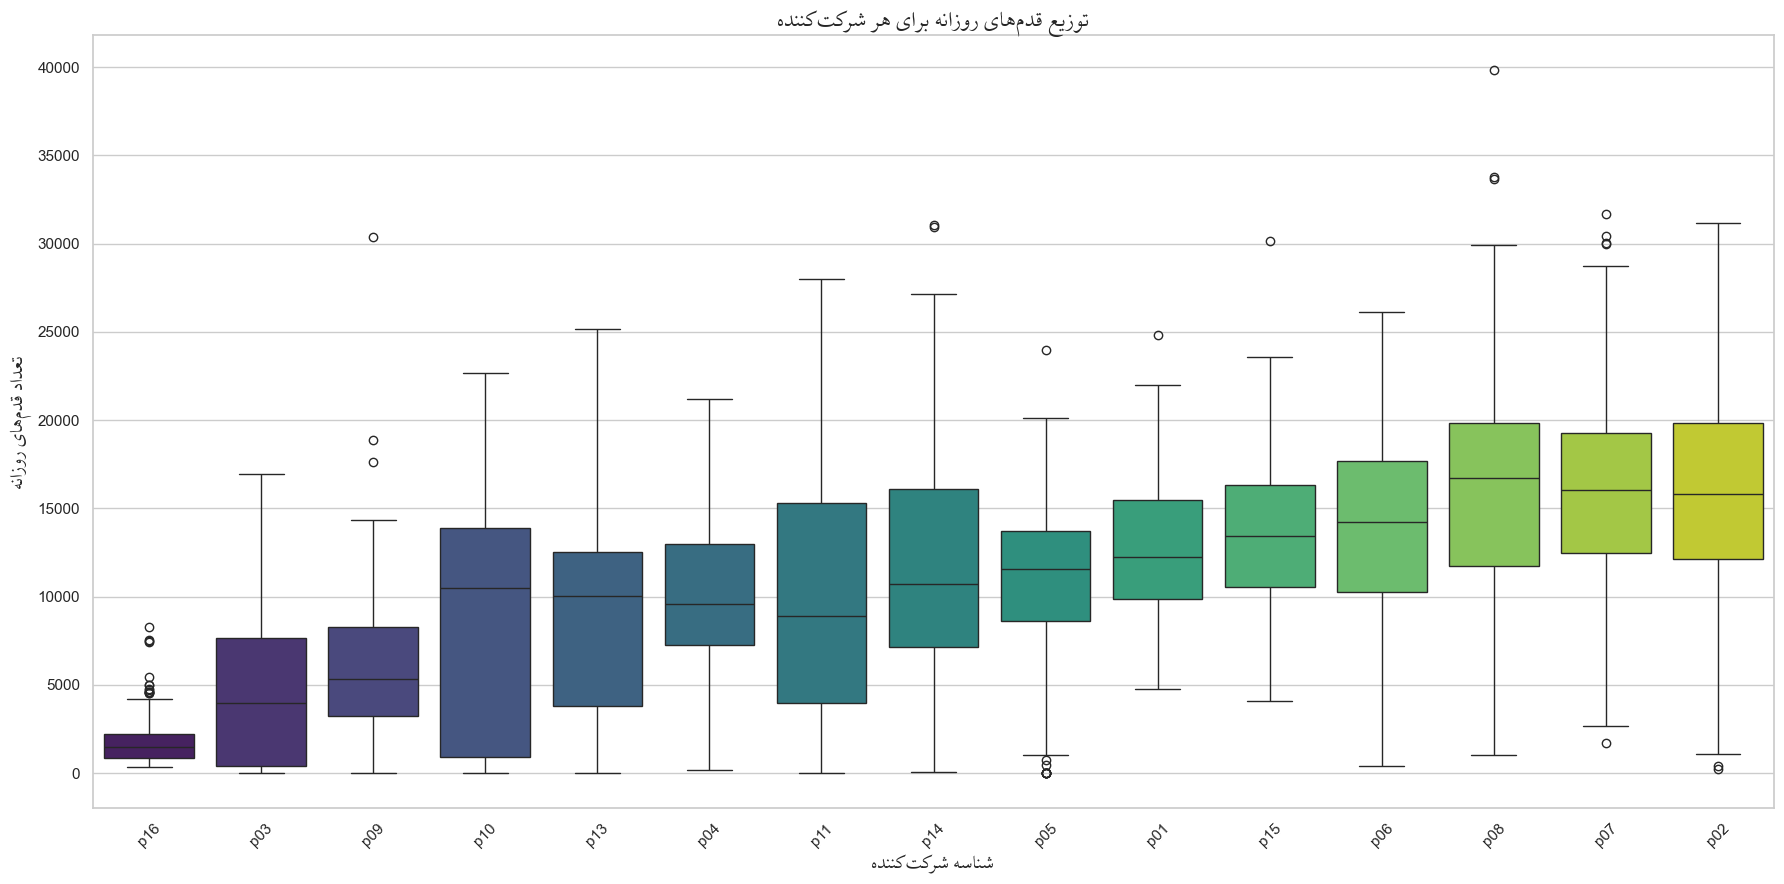

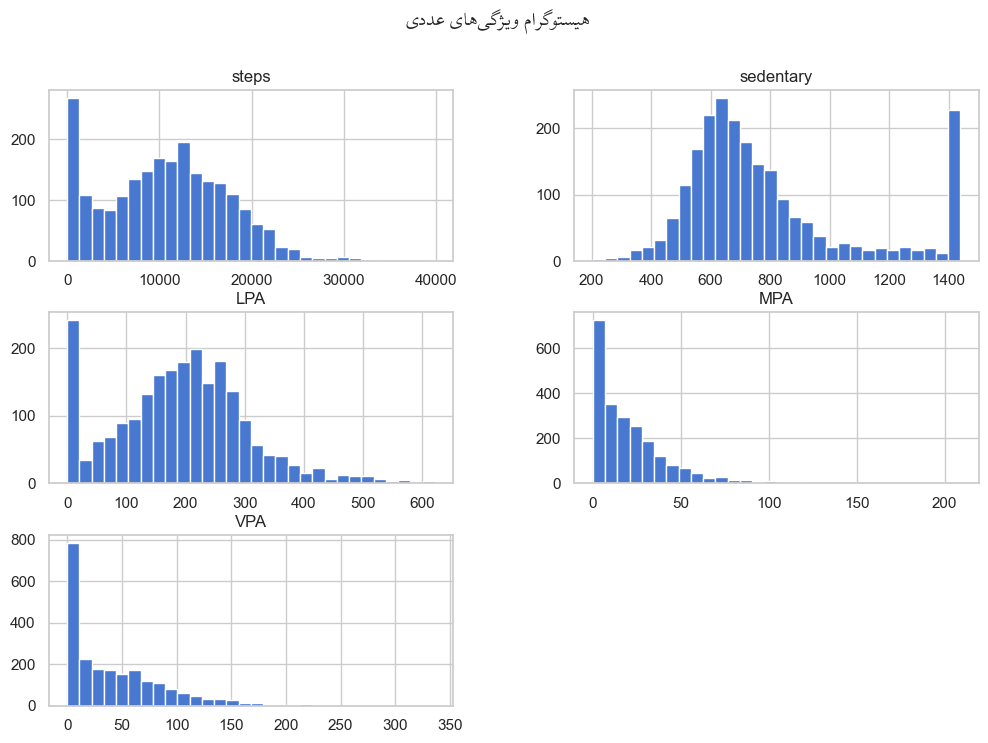

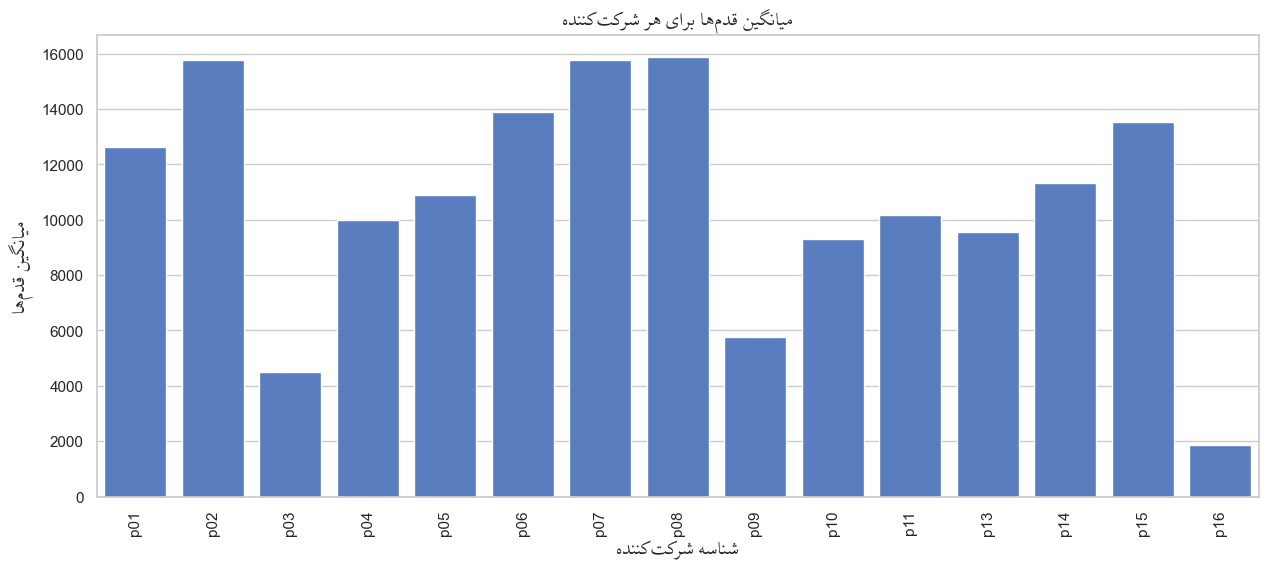

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_9516\1492428647.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_PMData, x='active', palette="Set2")


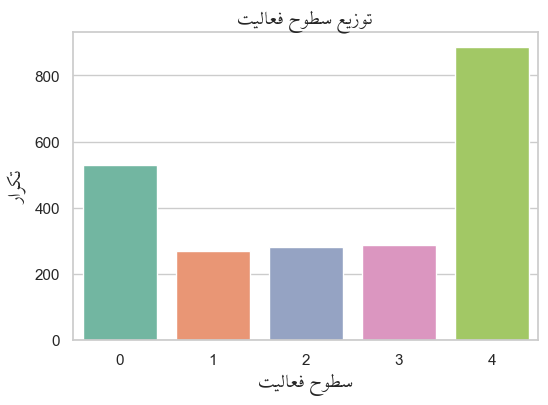

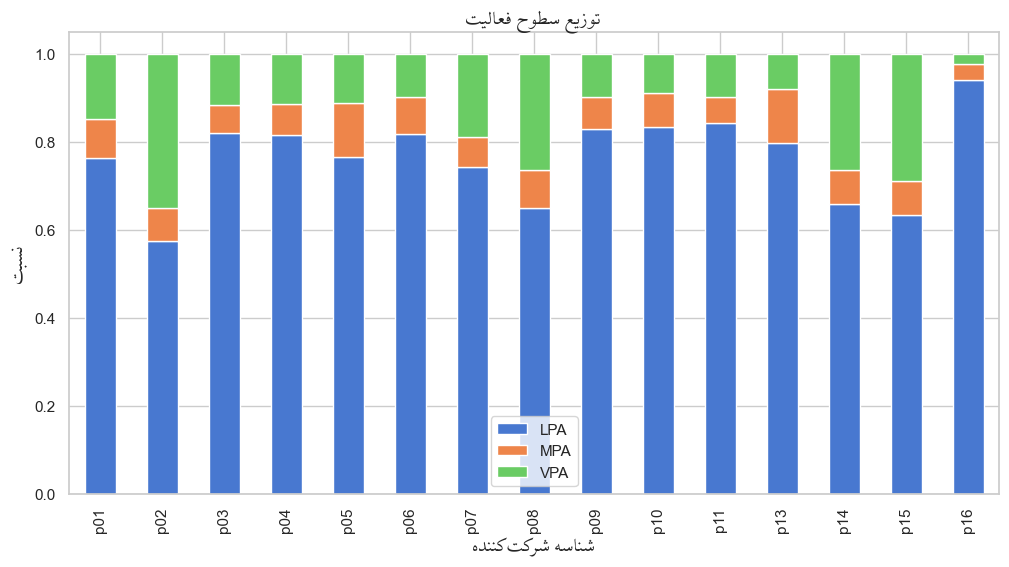

In [12]:
#Graphs for All data
sorted_order = df_PMData.groupby('item_id')['steps'].sum().sort_values().index

plt.figure(figsize=(18, 9))
sns.boxplot(x='item_id', y='steps', data=df_PMData, order=sorted_order, palette='viridis')

xtitle = get_display(arabic_reshaper.reshape("توزیع قدم‌های روزانه برای هر شرکت‌کننده"))
plt.title(xtitle, fontproperties=persian_font, fontsize=16)
xlabel = get_display(arabic_reshaper.reshape("شناسه شرکت‌کننده"))
plt.xlabel(xlabel, fontproperties=persian_font)
ylabel = get_display(arabic_reshaper.reshape("تعداد قدم‌های روزانه"))
plt.ylabel(ylabel, fontproperties=persian_font)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.savefig('participant_steps_boxplot.png')
plt.show()



# Set theme
plt.style.use("default")
sns.set_theme(style="whitegrid", palette="muted")

# 1. Histogram for numeric variables
numeric_cols = ['steps', 'sedentary', 'LPA', 'MPA', 'VPA']
df_PMData[numeric_cols].hist(bins=30, figsize=(12, 8))
suptitle = get_display(arabic_reshaper.reshape("هیستوگرام ویژگی‌های عددی"))
plt.suptitle(suptitle, fontproperties=persian_font)
plt.savefig('Histogram of Numeric Features_PMData.png')
plt.show()


# 5. Barplot of all steps per person
plt.figure(figsize=(15, 6))
steps = df_PMData.groupby("item_id")["steps"].mean().reset_index()
sns.barplot(data=steps, x="item_id", y="steps")
title = get_display(arabic_reshaper.reshape("میانگین قدم‌ها برای هر شرکت‌کننده"))
plt.title(title, fontproperties=persian_font)
x = get_display(arabic_reshaper.reshape("شناسه شرکت‌کننده"))
y = get_display(arabic_reshaper.reshape("میانگین قدم‌ها"))
plt.xlabel(x, fontproperties=persian_font)
plt.ylabel(y, fontproperties=persian_font)
plt.xticks(rotation=90)
plt.savefig('Average Steps per Person_PMData.png')
plt.show()


# 9. Countplot of active levels
plt.figure(figsize=(6, 4))
sns.countplot(data=df_PMData, x='active', palette="Set2")
title = get_display(arabic_reshaper.reshape("توزیع سطوح فعالیت"))
plt.title(title, fontproperties=persian_font)
x = get_display(arabic_reshaper.reshape("سطوح فعالیت"))
plt.xlabel(x, fontproperties=persian_font)
y = get_display(arabic_reshaper.reshape("تکرار"))
plt.ylabel(y, fontproperties=persian_font)
plt.savefig('Distribution of Activity Levels_PMData.png')
plt.show()

# 10. Stacked bar chart for LPA, MPA, VPA proportions per person
activity_share = df_PMData.groupby("item_id")[["LPA", "MPA", "VPA"]].mean()
activity_share_norm = activity_share.div(activity_share.sum(axis=1), axis=0)

activity_share_norm.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title(title, fontproperties=persian_font)
ylabel = get_display(arabic_reshaper.reshape("نسبت"))
plt.ylabel(ylabel, fontproperties=persian_font)
xlabel = get_display(arabic_reshaper.reshape("شناسه شرکت‌کننده"))
plt.xlabel(xlabel, fontproperties=persian_font)
plt.xticks(rotation=90)
plt.savefig('Average Proportion of Activity Types per Person_PMData.png')
plt.show()
